#### Predicting heart disease using machine learning
#### Data set : heart-disease.csv
#### 1. Problem Defination
#### 2. Data
#### 3. Evaluation
#### 4. Features
#### 5. Modeling
#### 6. Experimentations

### 1. Problem Defination
### > Given clinical parameters about the patient, can we predict whether a patient has a heart disease or not

### 2. Data
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0*3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [38]:
### preparing our tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [39]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, cols)

(303, 14)

### Data Exploration - Exploratory Data Analysis or EDA

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [42]:
# count how many classes there are?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

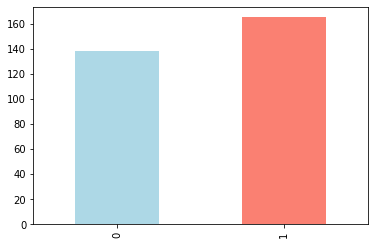

In [43]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [48]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


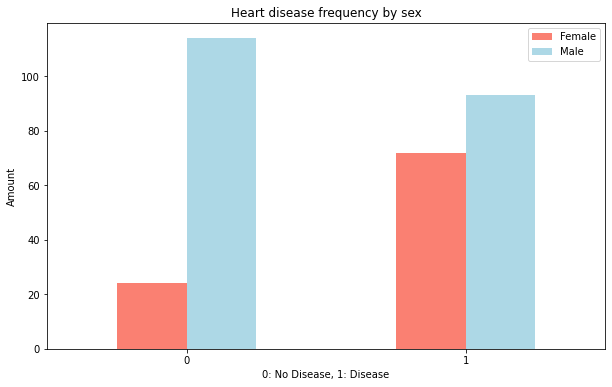

In [49]:
# Create a plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency by sex")
plt.xlabel("0: No Disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

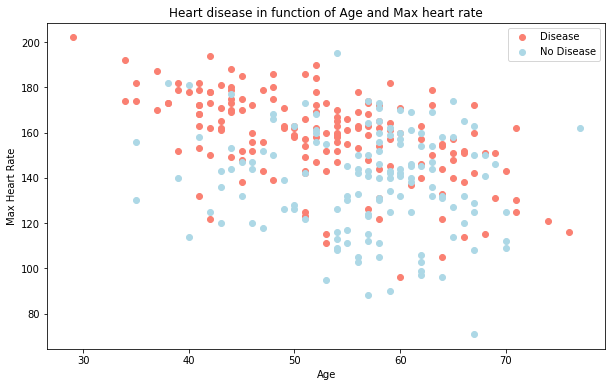

In [52]:
plt.figure(figsize=(10,6))
# positive example with heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color="salmon");
# negative example without heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="lightblue");

# Add some helpful info
plt.title("Heart disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

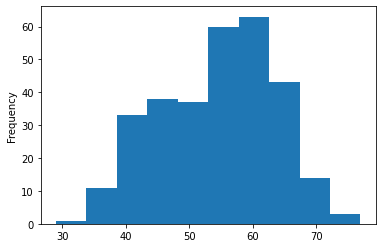

In [53]:
# Check the distribution of age column with a histogram
df.age.plot.hist();

In [54]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


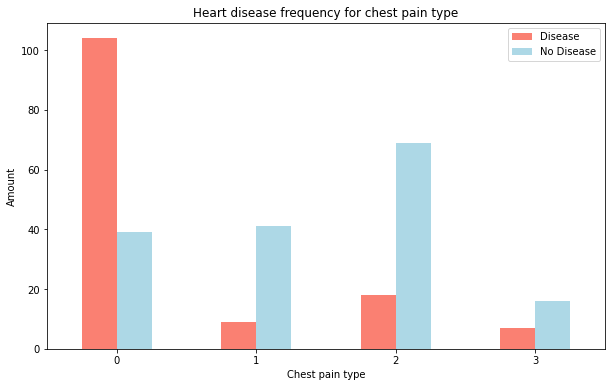

In [55]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency for chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


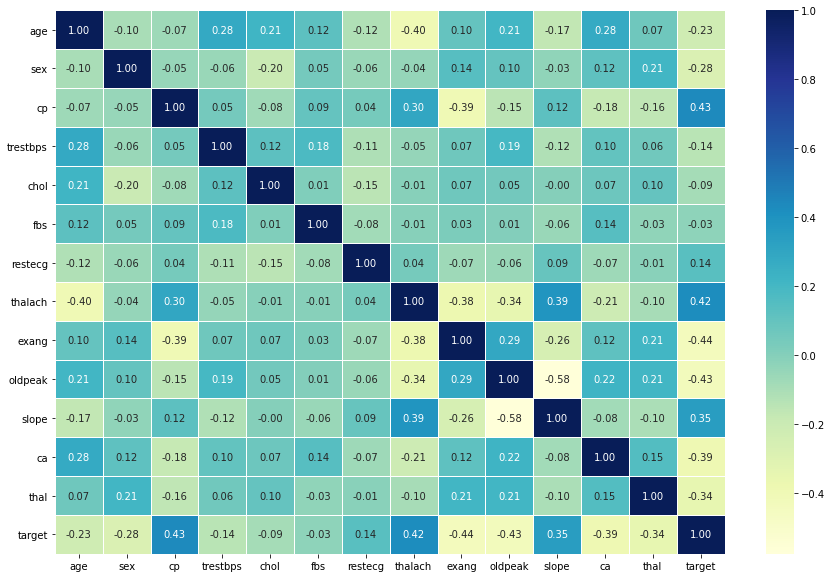

In [58]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

# Modeling

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
# Split data into X and y

X = df.drop("target", axis=1)
y = df.target

In [61]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [62]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [64]:
# Split into train and test set
np.random.seed(32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [66]:
y_train

134    1
273    0
268    0
201    0
213    0
      ..
71     1
252    0
88     1
43     1
215    0
Name: target, Length: 242, dtype: int64

In [72]:
# build a machine learning model
# 1. LogisticRegression
# 2. K-nearest Neighbors Classifier
# 3. RandomForest Classifier

# Put models in a dict
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fit and Evaluate the given machine learning model.
    models: a dict of different scikit learn models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    '''
    # Set random seed
    np.random.seed(32)
    # Make a dict to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the models and keep the scores to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [76]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/home/ashish/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8524590163934426}

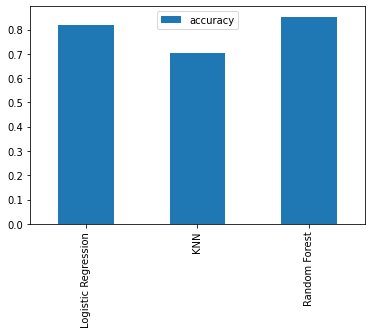

In [77]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

* Hyper parameter tunning for improving our models
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC curve
* Area Under Curve (AUC)

In [80]:
# Hyper parameter Tuning
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for n in neighbors:
    knn.set_params(n_neighbors=n)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores lits
    test_scores.append(knn.score(X_test, y_test))

Maximum score for test data is: 72.13


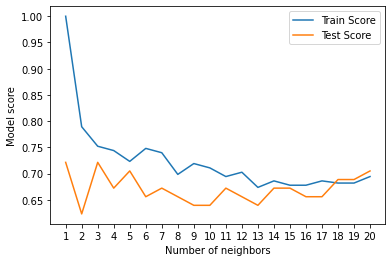

In [86]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum score for test data is: {max(test_scores) * 100:.2f}")

## Hyper parameter tuning with RandomizedSearchCV

In [89]:
# Tune LogisticRegression using RandomizedSearchCV
# CV : Cross Validation


# Create a hyper parameter grid for logistic regression
log_reg_grid = { "C": np.logspace(-4,4,20),
                 "solver": ["liblinear"]
               }

# create hyper parameter for random forest classifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [92]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyper parameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20,
                                verbose=True)

# Fit hyper parameter and search model for logistic regression
rs_log_reg.fit(X_train, y_train)





Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [94]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [95]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [99]:
# Tune RandomForest Classifier


# Tune LogisticRegression

np.random.seed(42)

# Setup random hyper parameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid, 
                                cv=5, 
                                n_iter=20,
                                verbose=True)

# Fit hyper parameter and search model for RF classifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [100]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [101]:
rs_rf.score(X_test, y_test)


0.8360655737704918

In [102]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8524590163934426}

## GridSearchCV implementation for LogisticRegresssion
## Hyper parameter tuning


In [103]:
# Create a hyper parameter grid for logistic regression
log_reg_grid = { "C": np.logspace(-4,4,32),
                 "solver": ["liblinear"]
               }

# setup grid hyper parameter search
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid hyper parameter
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.81160919e-04, 3.28192787e-04, 5.94557071e-04,
       1.07710506e-03, 1.95129342e-03, 3.53498111e-03, 6.40400427e-03,
       1.16015530e-02, 2.10174801e-02, 3.80754602e-02, 6.89778538e-02,
       1.24960914e-01, 2.26380341e-01, 4.10112707e-01, 7.42963951e-01,
       1.34596032e+00, 2.43835410e+00, 4.41734470e+00, 8.00250228e+00,
       1.44974067e+01, 2.62636353e+01, 4.75794431e+01, 8.61953566e+01,
       1.56152301e+02, 2.82886943e+02, 5.12480588e+02, 9.28414545e+02,
       1.68192432e+03, 3.04698957e+03, 5.51995432e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [104]:
gs_log_reg.best_params_

{'C': 0.41011270705513003, 'solver': 'liblinear'}

In [105]:
# Evaluate the gridsearch logistic regression model
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [106]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8524590163934426}

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }


# setup grid hyper parameter search
gs_log_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True)

# Fit grid hyper parameter
gs_log_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


In [ ]:
gs_log_rf.best_params_

In [ ]:
gs_log_rf.score(X_test, y_test)